In [1]:
import copy
from fireplace.exceptions import GameOver
from fireplace.utils import play_full_game
import logging
import random
from fireplace import cards
import pstats

%load_ext snakeviz

cards.db.initialize()
logging.disable(logging.WARNING) #logging.NOTSET

[fireplace.__init__]: Initializing card database
INFO:fireplace:Initializing card database
[fireplace.__init__]: Merged 2253 cards
INFO:fireplace:Merged 2253 cards


In [2]:
def run_game():
    try:
        play_full_game();
    except GameOver:
        pass

In [3]:
%%capture c
random.seed(1857)
%timeit -n100 run_game()

In [4]:
c.stdout.splitlines()[-1]

'100 loops, best of 3: 113 ms per loop'

In [5]:
%%capture
%%prun -D fireplace.prof
random.seed(1857)
for _ in range(100):
    run_game()

In [6]:
stats_f = 'fireplace.prof'
stats = pstats.Stats(stats_f)
stats.strip_dirs()
stats.dump_stats(stats_f)

In [7]:
import pandas as pd
from io import StringIO

index = pd.MultiIndex.from_tuples(stats.stats.keys())
df = pd.DataFrame(list(stats.stats.values()), index=index)
df.drop(df.columns[[4]], axis=1, inplace=True)
df.columns = ['ncalls', 'nreccalls', 'tottime', 'cumtime']
df.index.rename(['filename', 'lineno', 'function'], inplace=True)
df

ncalls  \
filename         lineno function                                      
warlock.py       58     <lambda>                                105   
random_picker.py 66     evaluate                                180   
utils.py         166    play_full_game                          100   
selector.py      236    <lambda>                               4957   
actions.py       55     __init__                              38884   
                 534    get_target_args                         405   
evaluator.py     174    check                                    17   
actions.py       642    get_target_args                        2904   
card.py          375    delayed_destruction                     115   
copy.py          192    _deepcopy_atomic                        134   
selector.py      109    value                                456459   
deck.py          10     __init__                                200   
card.py          617    zone_position                           591   
game.py          72     live_entities                         18761   
managers.py      62     action_end                            19325   
~                0      <built-in method _operator.or_>         547   
random.py        280    sample                                  713   
selector.py      297    eval                                    313   
actions.py       273    get_args                                 29   
player.py        121    live_entities                        150014   
                 28     __init__                                200   
selector.py      145    <listcomp>                             8295   
card.py          213    draw                                   3012   
selector.py      67     eval                                  22902   
utils.py         55     <genexpr>                                13   
actions.py       245    do                                     2289   
utils.py         101    <lambda>                                 88   
card.py          15     Card                                   7689   
                 836    get_damage                              122   
copy.py          137    deepcopy                                 28   
...                                                             ...   
utils.py         163    <listcomp>                              180   
card.py          150    cost                                  21326   
entity.py        42     log                                   34107   
card.py          826    _set_zone                               409   
selector.py      183    eval                                   5655   
card.py          383    to_be_destroyed                         115   
game.py          48     decks                                 43261   
managers.py      58     action_start                          19431   
~                0      <method 'items' of 'dict' objects>    88881   
card.py          816    __init__                                244   
                 417    events                               575005   
                 387    killed_this_turn                       1136   
~                0      <method 'keys' of 'dict' objects>       200   
_weakrefset.py   70     __contains__                          93229   
utils.py         57     <genexpr>                               900   
selector.py      355    <lambda>                             590255   
card.py          391    _hit                                   5431   
evaluator.py     50     trigger                                2329   
managers.py      76     step                                  20827   
utils.py         63     random_draft                            200   
~                0      <built-in method _operator.sub>        1725   
card.py          700    _set_zone                               137   
                 747    <lambda>                              12838   
selector.py      241    <lambda>                                 44   
card.py       

In [10]:
pd.options.display.float_format = '{:.2f}'.format
c = 'tottime'
breakdown = (pd.DataFrame(df.groupby(level='filename').sum()[c]  / df[c].sum())
    .sort_values(by=c, ascending=False))
breakdown

,tottime
filename,
card.py,0.16
~,0.15
entity.py,0.13
selector.py,0.10
actions.py,0.10
game.py,0.09
cardxml.py,0.06
player.py,0.05
utils.py,0.04


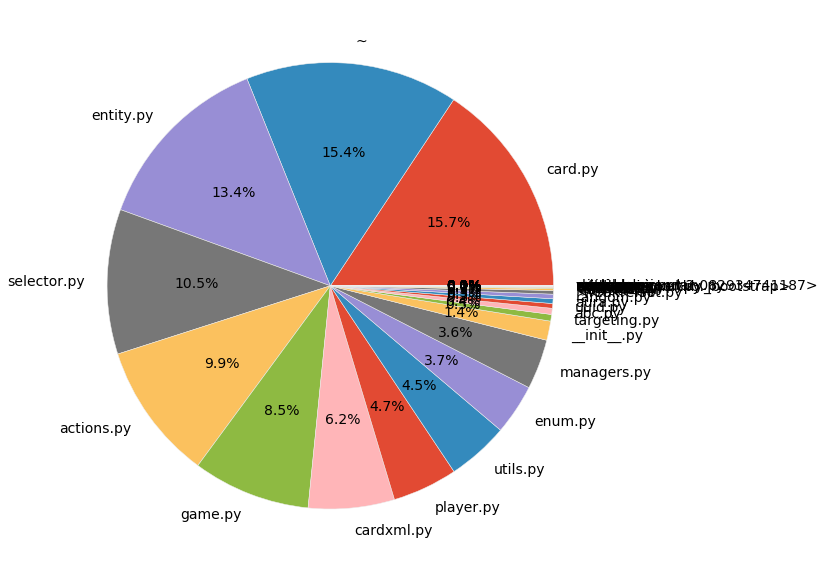

In [32]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 10))
breakdown.plot.pie(subplots=True, figsize=(10, 10), ax=ax, autopct='%.1f%%', fontsize=14)
ax.legend().set_visible(False)
plt.ylabel('')
